# ANALISIS DESCRITIVO PRELIMINAR DEL PROYECTO CAPSTONE 
Nombres: Stephanie Salomé Mejía Vera 
         Diana Carolina Cabezas Falcón 

In [2]:
#pip install missingno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Cargar el archivo Excel
file_path = 'C:/Users/svera3/OneDrive - SLB/SVERA3/MAESTRIA/Base de Datos BO.xlsx'  
df = pd.read_excel(file_path, index_col=False)
print(df.head())  # Revisa la estructura del dataframe
print(df.columns)  # Verifica las columnas
# df = pd.read_csv('ruta_al_archivo.csv', index_col=False)
# Descripción General del Dataset
df_dimensions = df.shape
df_dtypes = df.dtypes
df_missing = df.isnull().sum()
 
# Estadísticas descriptivas básicas
df_descriptive_stats = df.describe()
 
# Imprimir información básica
print(f"Dimensiones del dataset: {df_dimensions}")
print(f"Tipos de datos:\n{df_dtypes}")
print(f"Valores nulos:\n{df_missing}")
print(f"Estadísticas descriptivas:\n{df_descriptive_stats}")
 


       UM Fecha de compra  COD_CLIENTE  \
0  SACOS       2022-01-02       101470   
1  SACOS       2022-01-02       101680   
2  SACOS       2022-01-02       101680   
3  SACOS       2022-01-02       101730   
4  SACOS       2022-01-02       101730   

                                      Nombre Cliente Zona de CIO  \
0                           SARABIA YEPEZ RUTH IRENE        6EC7   
1                             DISTRIBUCIONES NARANJO        6EC7   
2                             DISTRIBUCIONES NARANJO        6EC7   
3  SOCIEDAD CIVIL Y COMERCIAL FERRYBLOQ COTOPAXI SCC        6ECJ   
4  SOCIEDAD CIVIL Y COMERCIAL FERRYBLOQ COTOPAXI SCC        6ECJ   

            Nombre Zona  Toneladas  
0  LTACUNGSALCEDSAQCILI       27.0  
1  LTACUNGSALCEDSAQCILI       47.0  
2  LTACUNGSALCEDSAQCILI       11.0  
3   ATCMESTONSPSMETONCH        5.0  
4   ATCMESTONSPSMETONCH       14.0  
Index(['UM', 'Fecha de compra', 'COD_CLIENTE', 'Nombre Cliente', 'Zona de CIO',
       'Nombre Zona', 'Toneladas'],


In [4]:
df.rename({'Fecha de compra':'Fecha', 'UM': 'Unidad_medida', 'COD_CLIENTE':'ID', 
           'Nombre Cliente': 'Cliente', 'Zona de CIO':'Zona_ventas', 'Nombre Zona':'Nombre_zona', 'Toneladas':'Toneladas'}, axis=1, inplace=True)

In [5]:
df.head()

,Unidad_medida,Fecha,ID,Cliente,Zona_ventas,Nombre_zona,Toneladas
0,SACOS,2022-01-02,101470,SARABIA YEPEZ RUTH IRENE,6EC7,LTACUNGSALCEDSAQCILI,27.0
1,SACOS,2022-01-02,101680,DISTRIBUCIONES NARANJO,6EC7,LTACUNGSALCEDSAQCILI,47.0
2,SACOS,2022-01-02,101680,DISTRIBUCIONES NARANJO,6EC7,LTACUNGSALCEDSAQCILI,11.0
3,SACOS,2022-01-02,101730,SOCIEDAD CIVIL Y COMERCIAL FERRYBLOQ COTOPAXI SCC,6ECJ,ATCMESTONSPSMETONCH,5.0
4,SACOS,2022-01-02,101730,SOCIEDAD CIVIL Y COMERCIAL FERRYBLOQ COTOPAXI SCC,6ECJ,ATCMESTONSPSMETONCH,14.0


<Axes: >

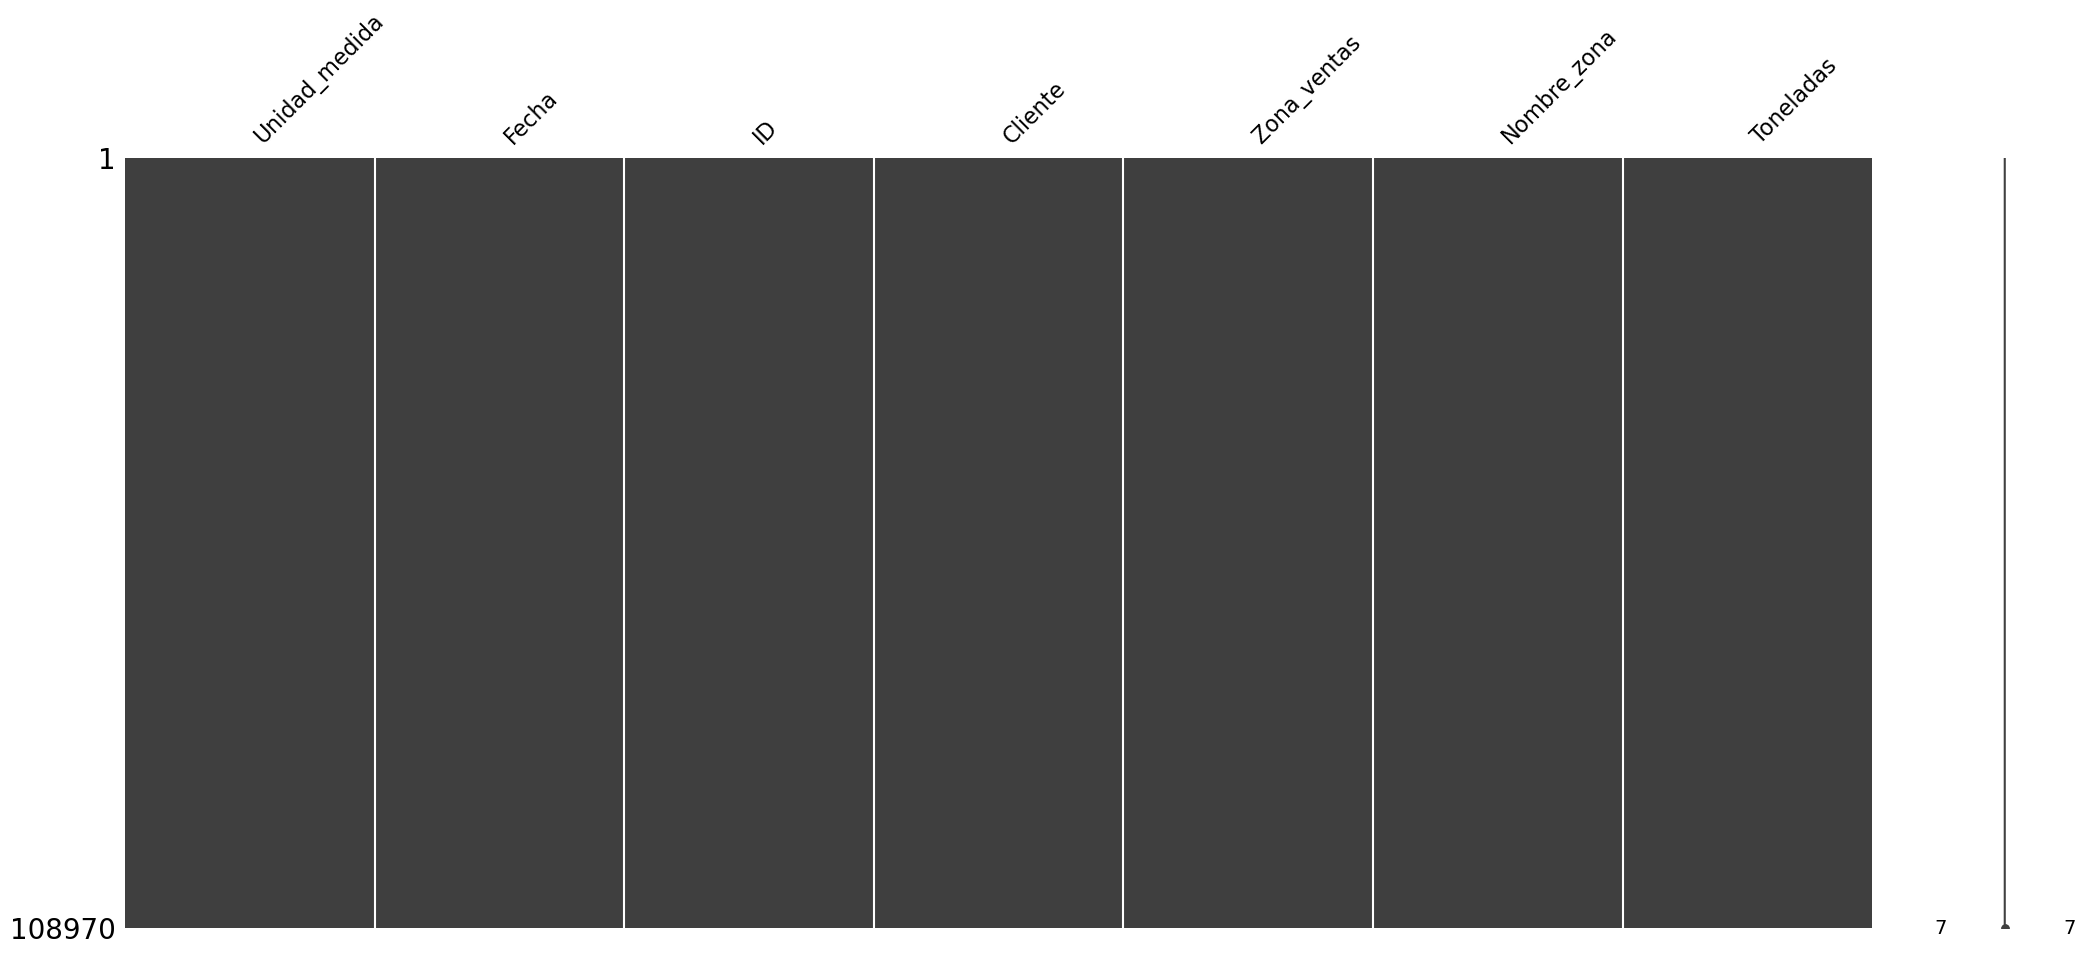

In [6]:
import missingno as msno
msno.matrix(df)

C:\Users\svera3\AppData\Local\Temp\ipykernel_49940\355146697.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Toneladas'], bins=30, kde=True)


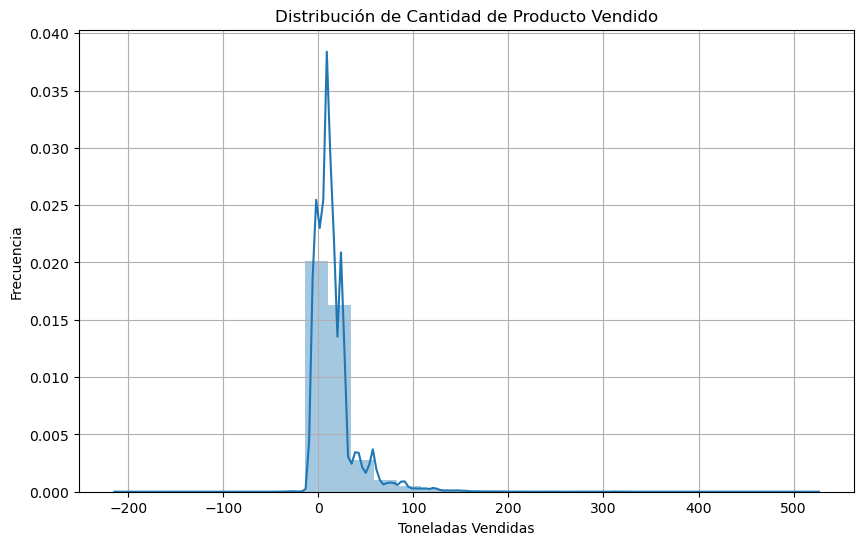

In [7]:
# Gráfico 1: Distribución de las Ventas (Histograma)
plt.figure(figsize=(10, 6))
sns.distplot(df['Toneladas'], bins=30, kde=True)
plt.title('Distribución de Cantidad de Producto Vendido')
plt.xlabel('Toneladas Vendidas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

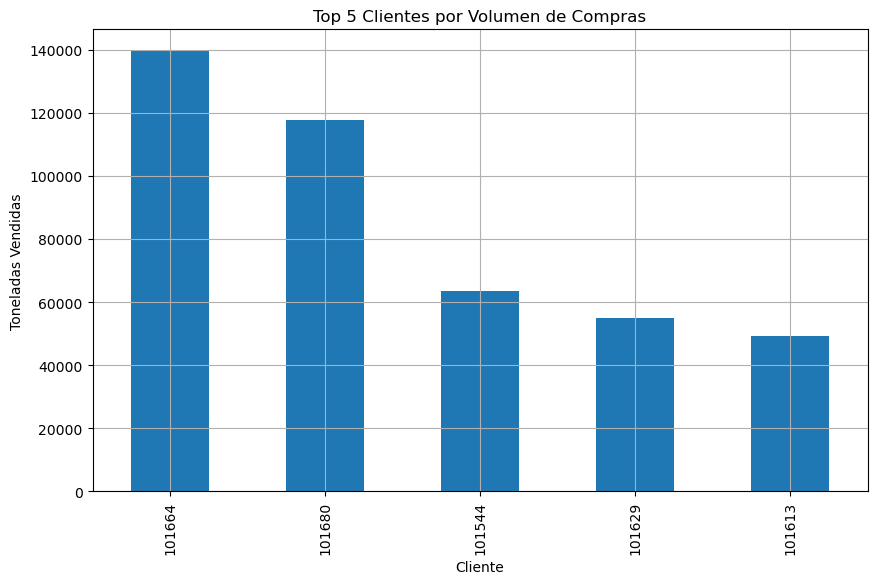

In [8]:
# Gráfico 2: Segmentación de Clientes por Volumen Total de Compras
top_customers = df.groupby('ID').sum(numeric_only=True)['Toneladas'].sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 5 Clientes por Volumen de Compras')
plt.xlabel('Cliente')
plt.ylabel('Toneladas Vendidas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

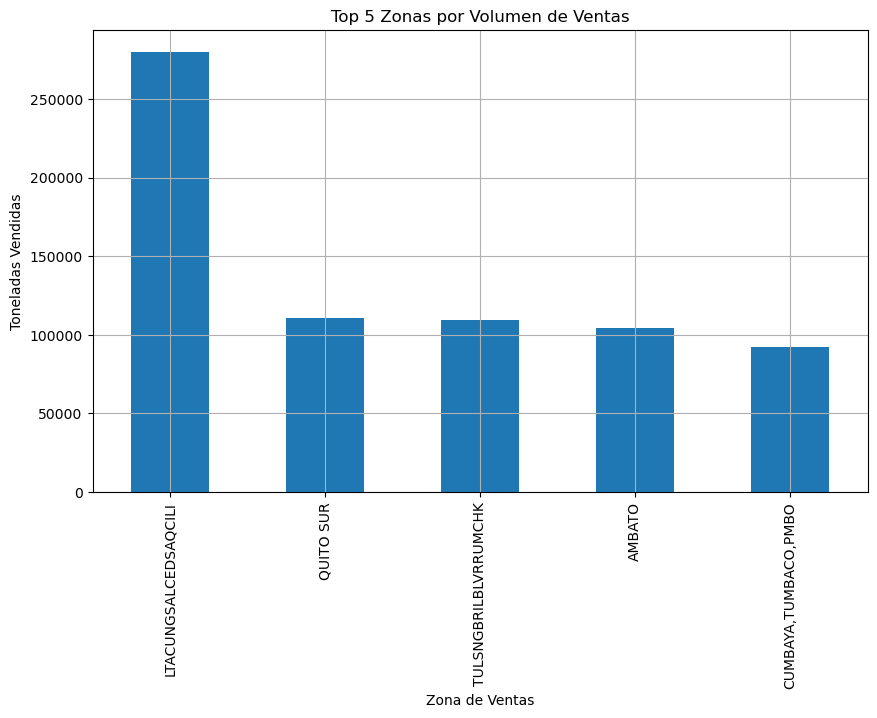

In [9]:
# Gráfico 3: Distribución Geográfica de Ventas
top_zones = df.groupby('Nombre_zona').sum(numeric_only=True)['Toneladas'].sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_zones.plot(kind='bar')
plt.title('Top 5 Zonas por Volumen de Ventas')
plt.xlabel('Zona de Ventas')
plt.ylabel('Toneladas Vendidas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

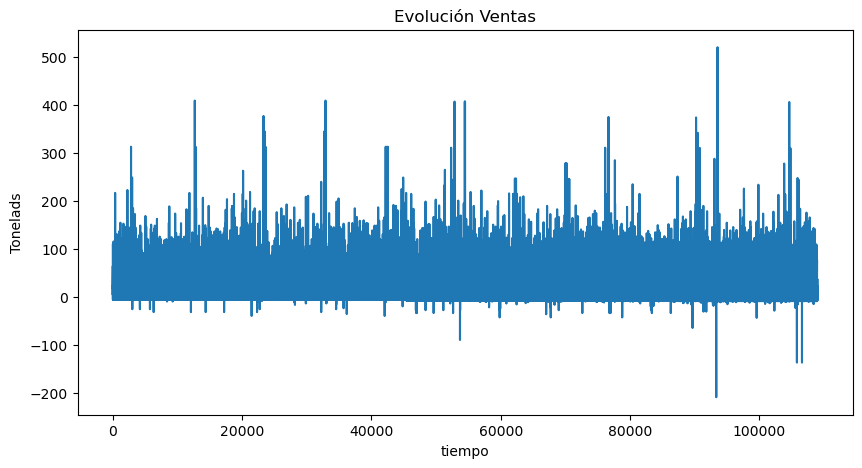

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df.Toneladas)
plt.title("Evolución Ventas")
plt.xlabel("tiempo")
plt.ylabel("Tonelads")
plt.show()

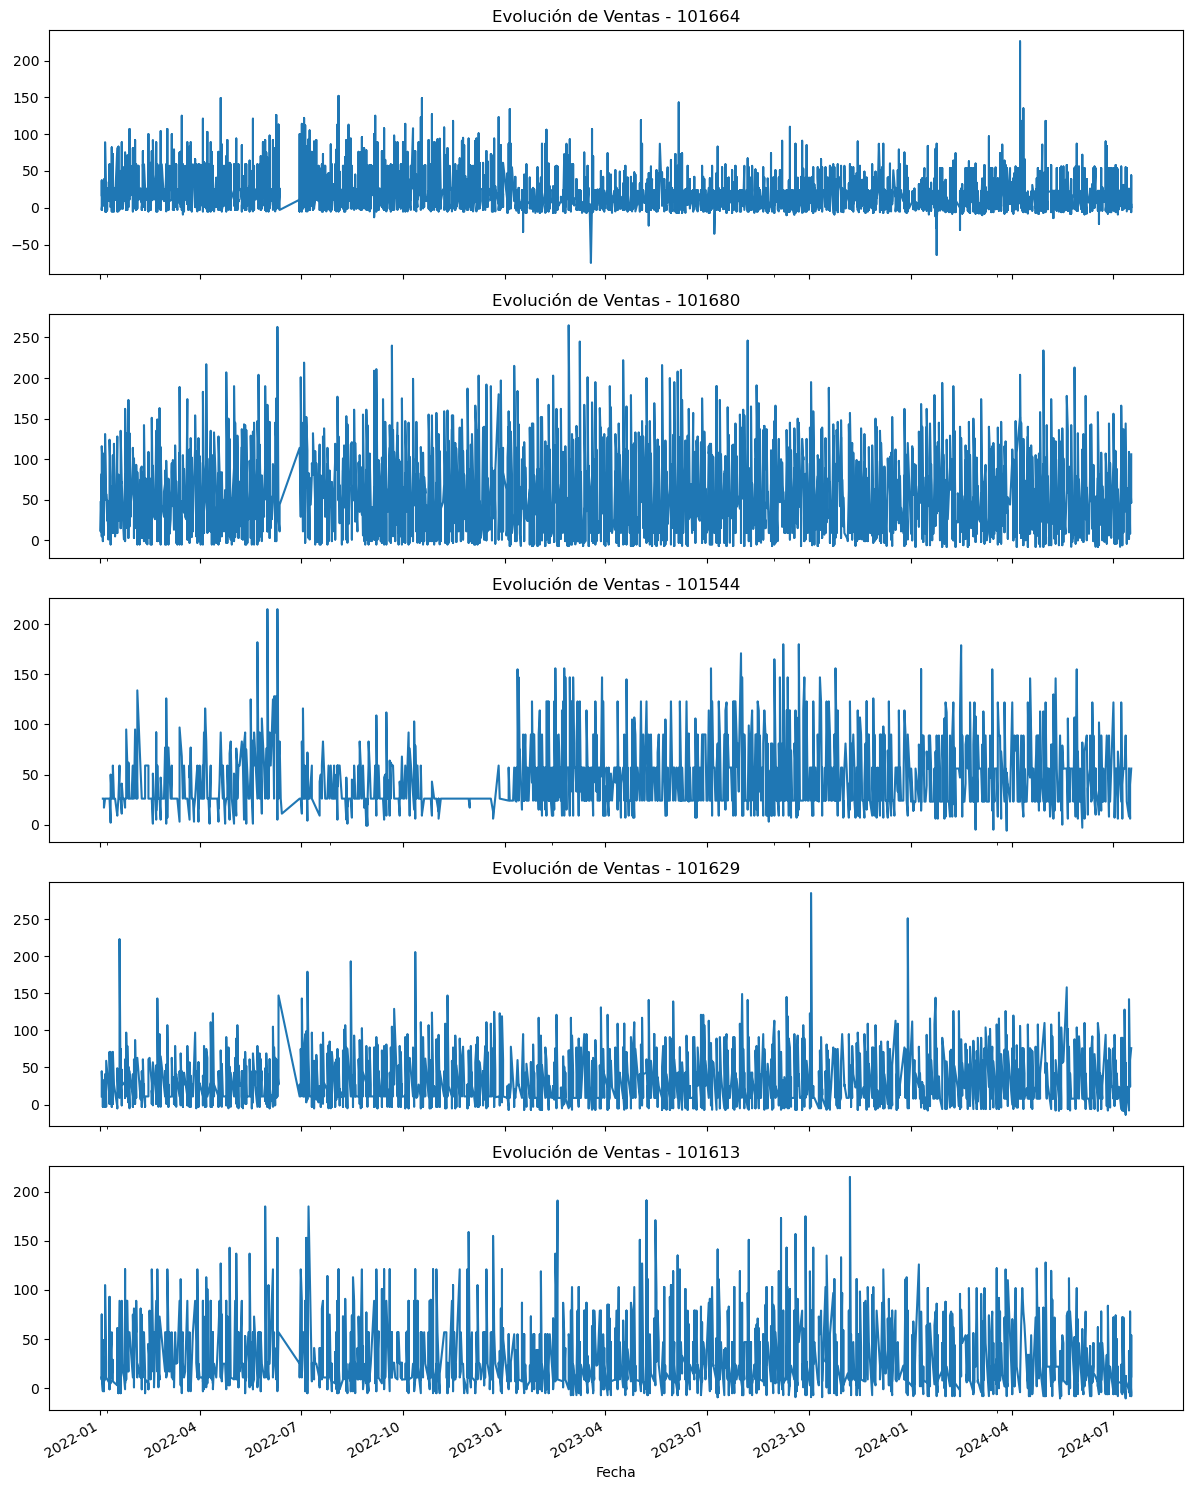

In [11]:

#  5 mejores clientes en función de las ventas totales.

top_clients = df.groupby('ID')['Toneladas'].sum().nlargest(5).index

# Filtra el DataFrame para solo incluir los datos de los 5 mejores clientes
df_top_clients = df[df['ID'].isin(top_clients)]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 15), sharex=True)

for i, client in enumerate(top_clients):
    df_client = df_top_clients[df_top_clients['ID'] == client]
    df_client.plot(x='Fecha', y='Toneladas', ax=axes[i], legend=False)
    axes[i].set_title(f'Evolución de Ventas - {client}')

plt.tight_layout()
plt.show()

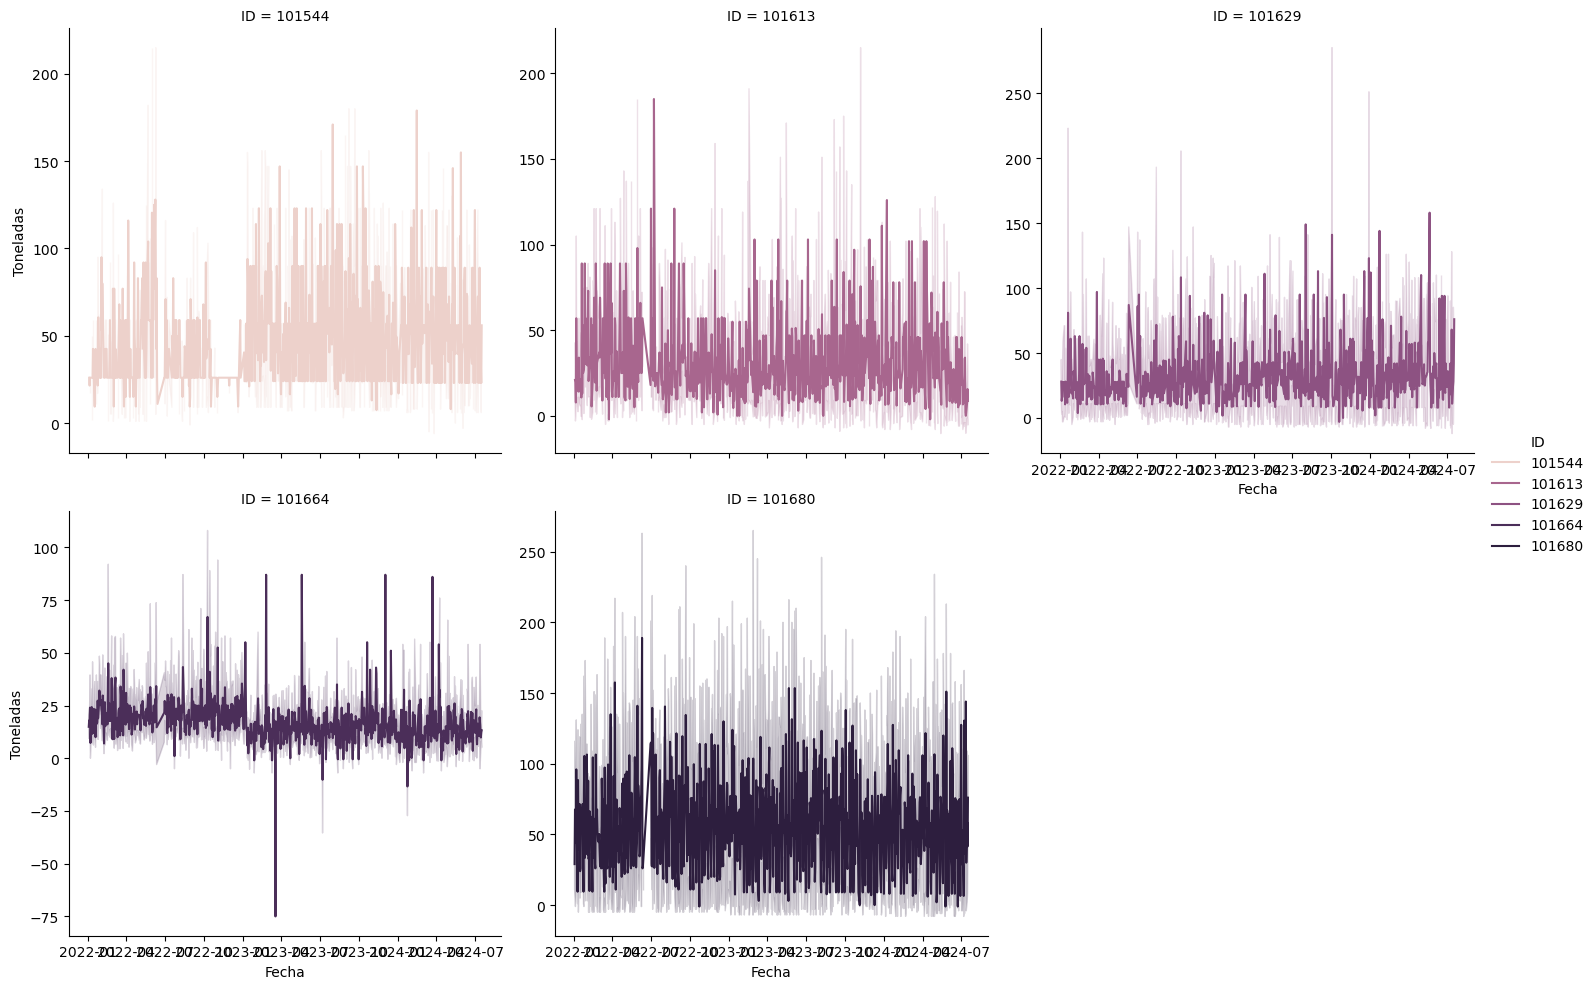

In [12]:
import seaborn as sns
sns.relplot(data=df_top_clients, x="Fecha", y="Toneladas", hue="ID",
            col="ID", col_wrap=3, kind="line",
            facet_kws={'sharey': False, 'sharex': True}
            )

In [13]:
df.set_index('Fecha', inplace=True)

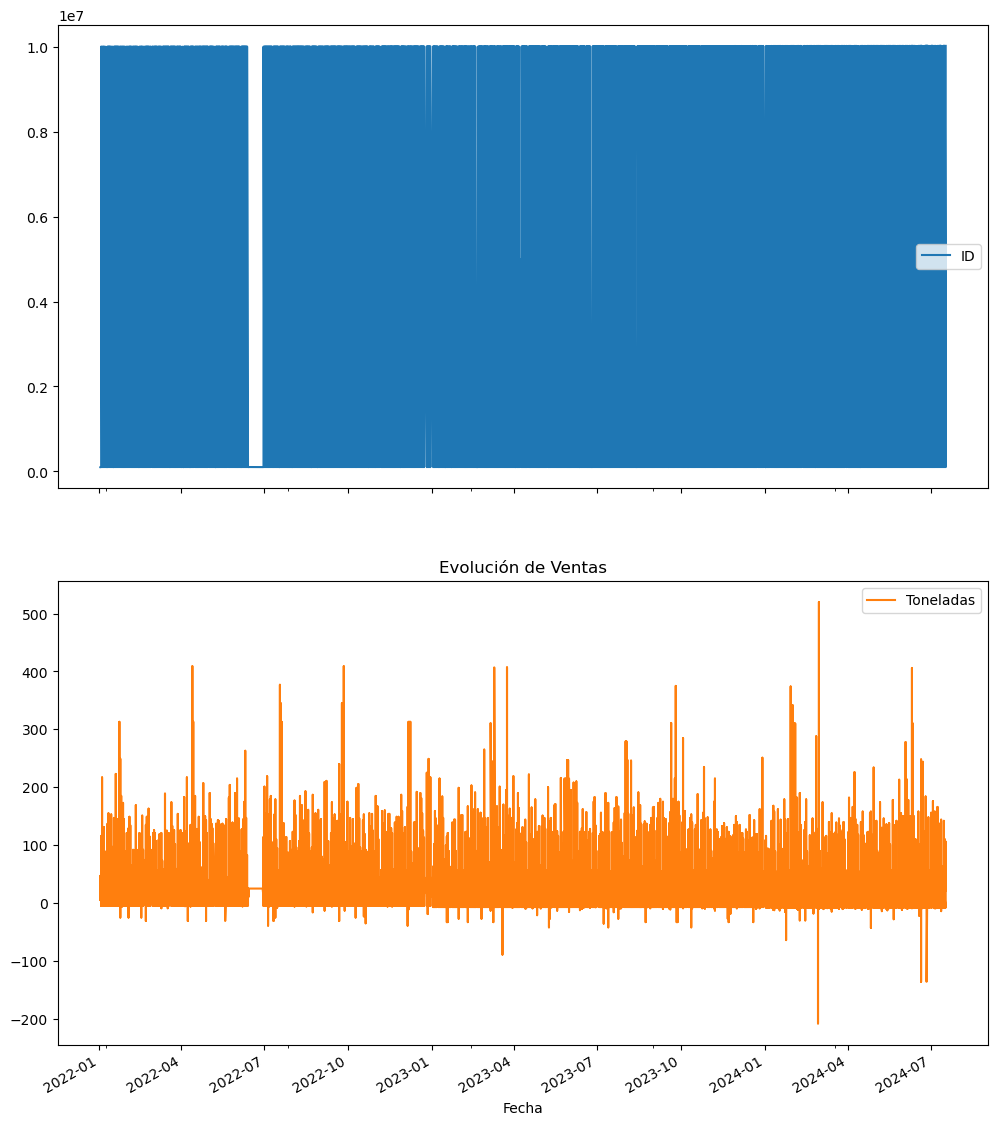

In [14]:
df.plot(subplots=True, figsize=(12,15))
plt.title('Evolución de Ventas')

plt.show()

In [15]:
df.describe()

,ID,Toneladas
count,1.089700e+05,108970.000000
mean,1.036540e+06,15.710752
std,2.884824e+06,22.829930
min,1.014430e+05,-208.000000
25%,1.016120e+05,3.000000
50%,1.016830e+05,11.000000
75%,1.029700e+05,23.000000
max,1.002888e+07,520.000000
